In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt

file_name = "data/210407/soc_210407.h5"
h5_file = h5py.File(file_name, "r")

# Soil carbon transect

Transect runs from inside garden (high OC) in a line away from garden.

1. ins001:  in garden
1. ins002: at edge of garden
1. ins003: back about 1 ft.
1. ins004: back another foot.
1. ins005: back another foot.

In [2]:
insertions = list(h5_file['session001/cal001'].keys())
insertions

['ins001', 'ins002', 'ins003', 'ins004', 'ins005']

In [3]:
vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]

# Visible light spectrometer

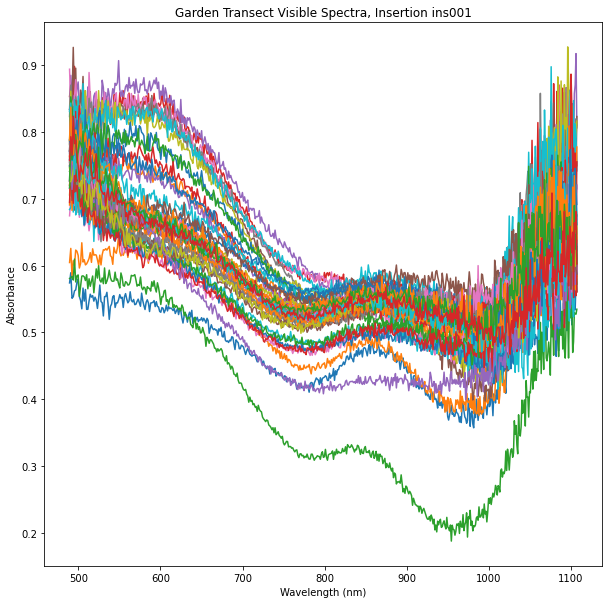

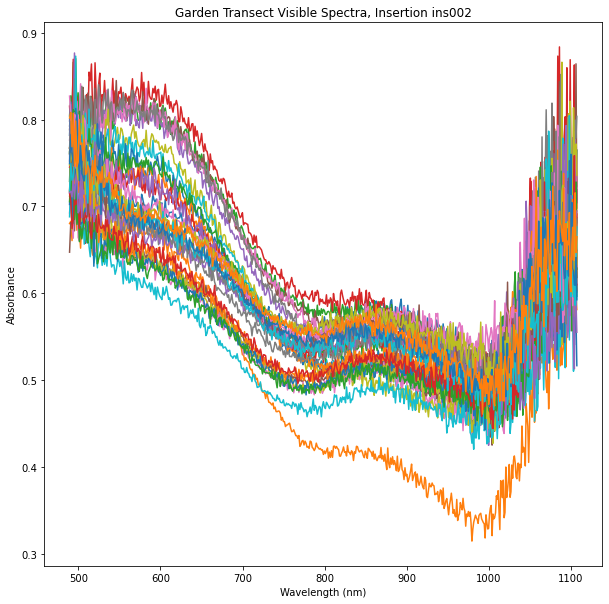

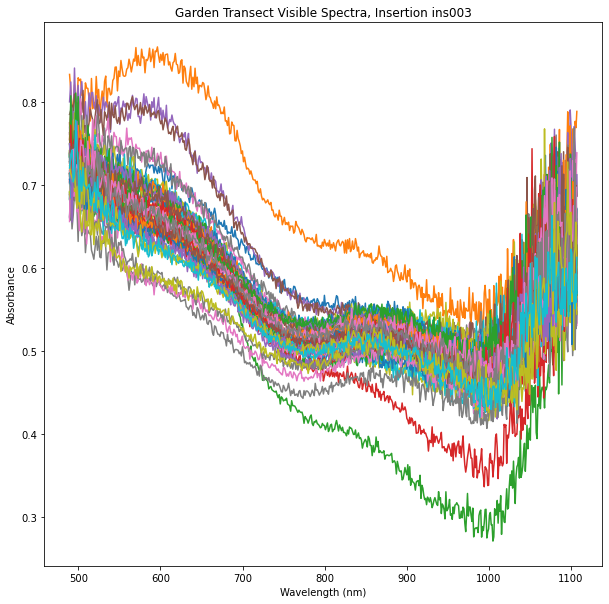

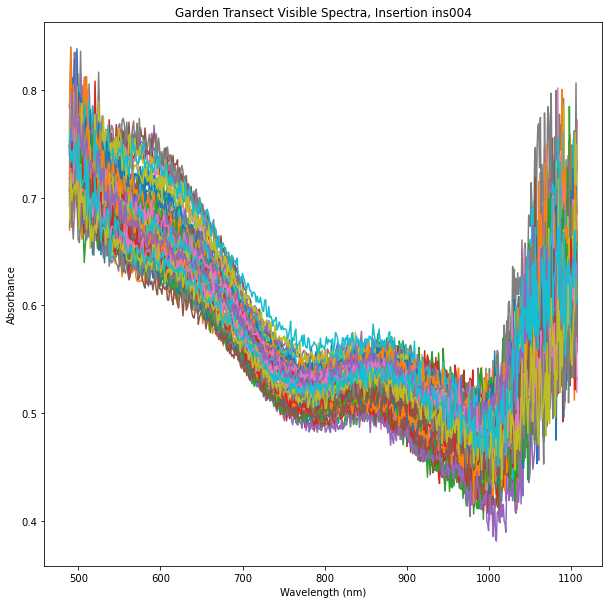

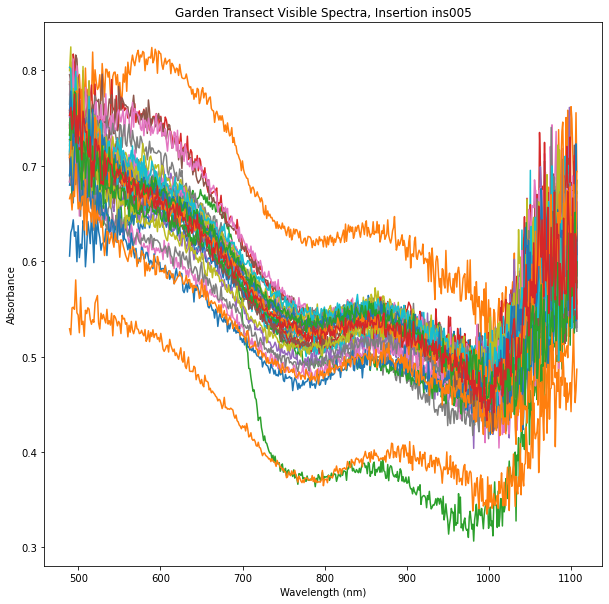

In [4]:
for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer1/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Garden Transect Visible Spectra, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    for i in range (ins_abs.shape[0]):
        ax.plot(vis_waves, ins_abs[i, :])
    plt.show()

# FTIR Engine spectrometer

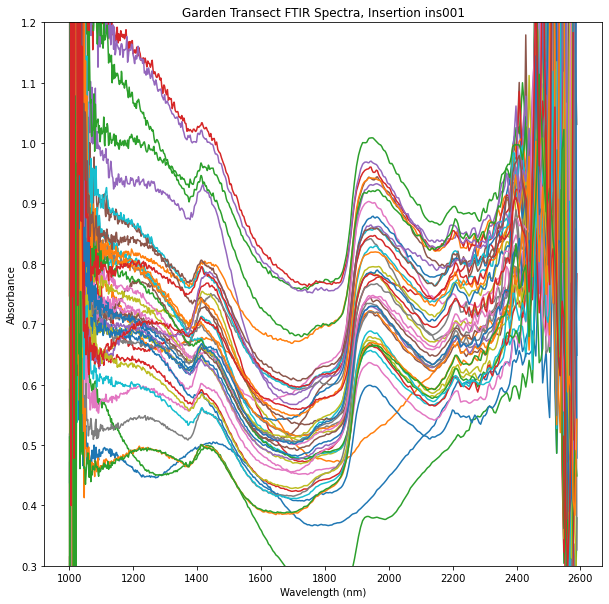

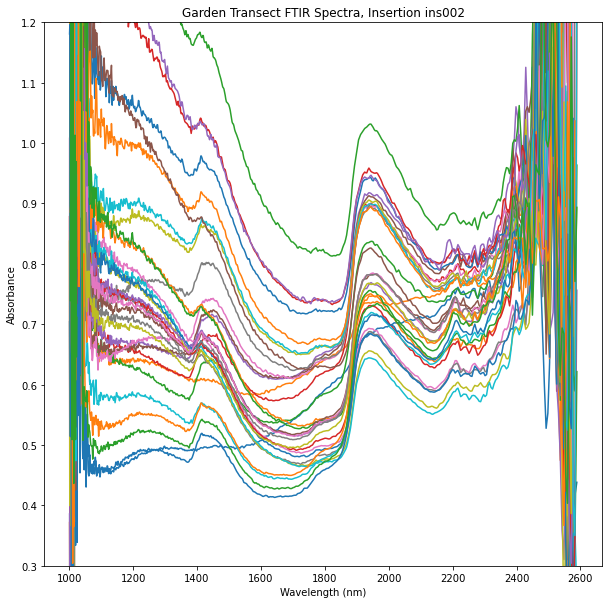

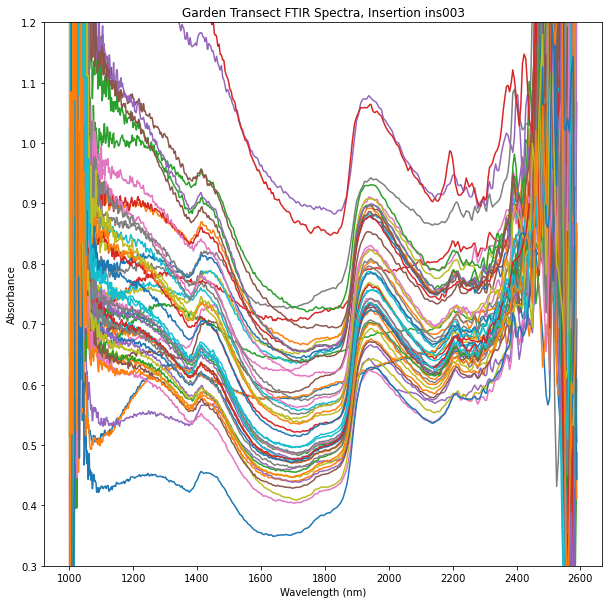

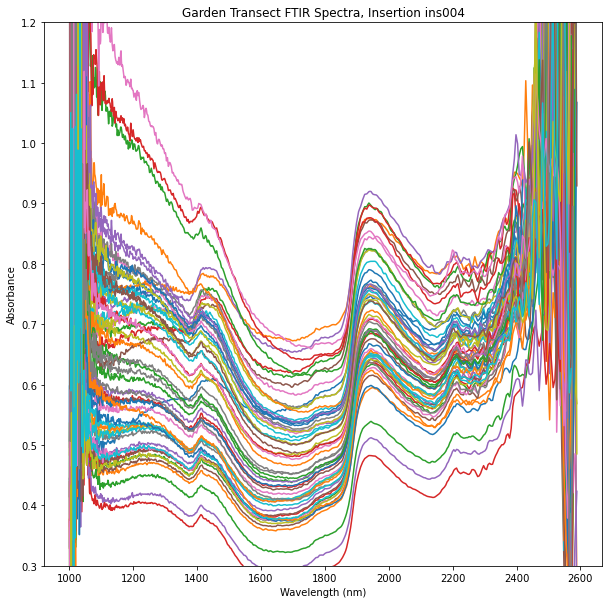

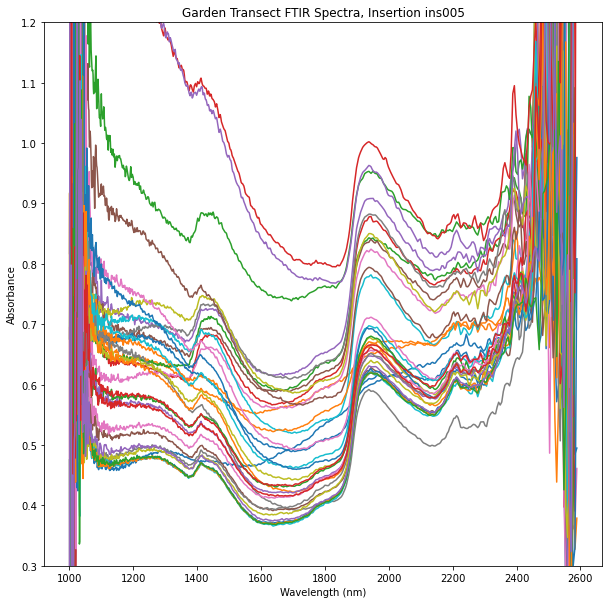

In [5]:
for insertion in insertions:
    ins_abs = h5_file[f'session001/cal001/{insertion}/spectrometer2/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Garden Transect FTIR Spectra, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(0.3, 1.2)
    for i in range (ins_abs.shape[0]):
        ax.plot(ftir_waves, ins_abs[i, :])
    plt.show()

# Force by depth

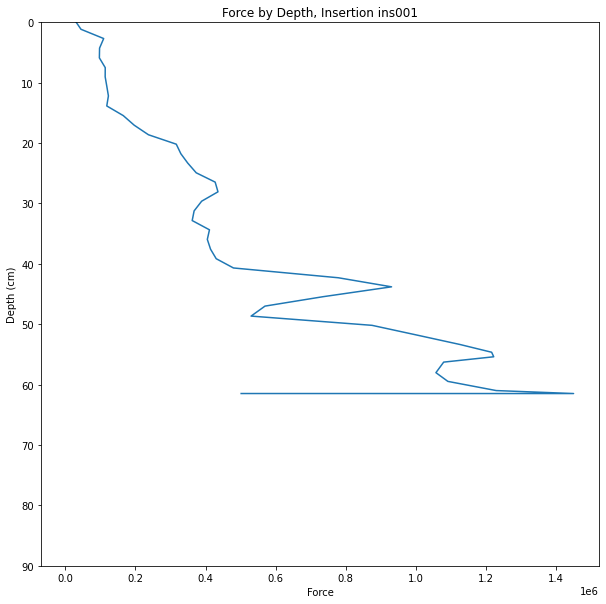

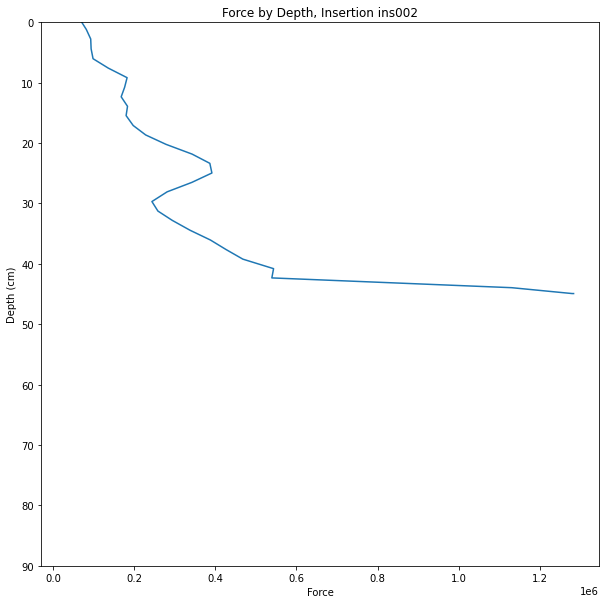

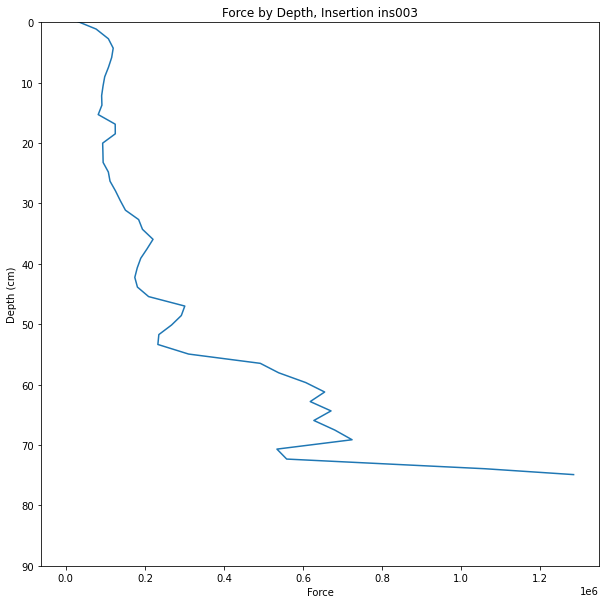

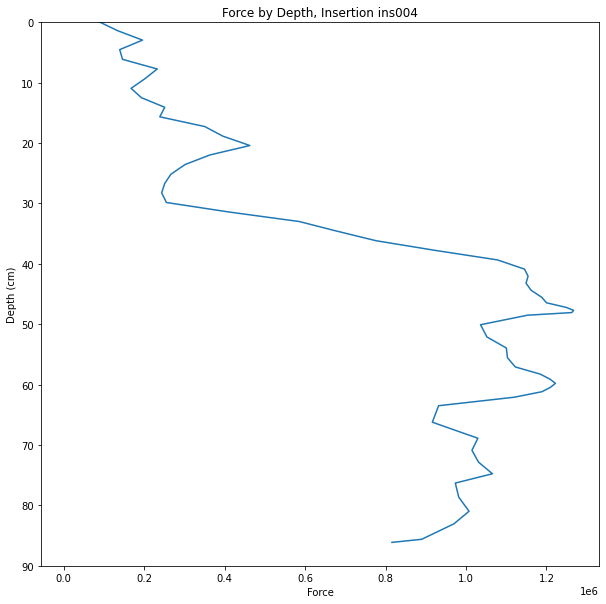

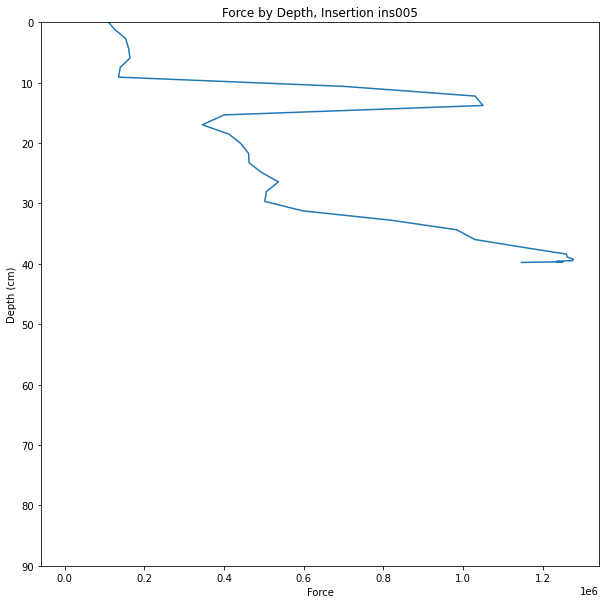

In [6]:
for insertion in insertions:
    ins_force = h5_file[f'session001/cal001/{insertion}/derived/absorbance_depth'][:, -2]
    ins_depth = h5_file[f'session001/cal001/{insertion}/derived/absorbance_depth'][:, -1]
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Force by Depth, Insertion {insertion}")
    ax.set_ylim(90.0, 0.0)
    # ax.set_xlim(0, 175000)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Force")
    ax.plot(ins_force, ins_depth )

# Absorbance by depth at selected wavelengths:  Insertion 1

In [7]:
abs1 = h5_file['session001/cal001/ins001/derived/absorbance_depth']
cols = vis_waves.astype(int).tolist()
cols = cols + ftir_waves.astype(int).tolist()
cols.append('force')
cols.append('depth')
ins1_abs_df = pd.DataFrame(data=abs1, columns=cols)
ins1_abs_df

489       490       492       493       495       496       498  \
0   0.574005  0.589227  0.551030  0.553341  0.562148  0.563562  0.574735   
1   0.604466  0.625591  0.583303  0.607196  0.600142  0.623073  0.621303   
2   0.580621  0.581514  0.583822  0.578310  0.609586  0.575456  0.584474   
3   0.852640  0.870200  0.768680  0.841947  0.897682  0.857435  0.825475   
4   0.833606  0.884261  0.848877  0.854018  0.839015  0.846945  0.863949   
5   0.833606  0.841451  0.847443  0.926055  0.845359  0.895024  0.816366   
6   0.893410  0.836207  0.829681  0.818767  0.851333  0.877754  0.835634   
7   0.822760  0.869688  0.821065  0.837392  0.829670  0.851930  0.841238   
8   0.785729  0.860571  0.796622  0.825328  0.820523  0.826695  0.836063   
9   0.832176  0.810450  0.826032  0.799660  0.817944  0.830150  0.783246   
10  0.771013  0.831026  0.787384  0.784556  0.798667  0.817756  0.816366   
11  0.764041  0.751260  0.780377  0.738899  0.802785  0.816074  0.782109   
12  0.780627  0.852133  0.836141  0.815739  0.787738  0.819022  0.802258   
13  0.748850  0.780264  0.753045  0.823130  0.784552  0.846495  0.765032   
14  0.768540  0.791232  0.756901  0.755088  0.766292  0.785293  0.810264   
15  0.771427  0.771194  0.724088  0.740346  0.682788  0.736526  0.740613   
16  0.674310  0.699869  0.698293  0.712623  0.689750  0.740034  0.693687   
17  0.725897  0.745454  0.721581  0.734229  0.710326  0.730280  0.708133   
18  0.705516  0.734069  0.749985  0.738899  0.743682  0.727876  0.769422   
19  0.683675  0.686573  0.705459  0.679893  0.765911  0.675649  0.694305   
20  0.715223  0.709318  0.697954  0.723292  0.709991  0.739330  0.719129   
21  0.690490  0.745454  0.682344  0.721207  0.730521  0.744638  0.721098   
22  0.740678  0.736699  0.704771  0.727142  0.759122  0.740387  0.721757   
23  0.694285  0.745454  0.702373  0.722248  0.729821  0.710747  0.729067   
24  0.725524  0.785292  0.726970  0.743620  0.779424  0.819445  0.783246   
25  0.719608  0.737453  0.697278  0.715694  0.709991  0.742862  0.743375   
26  0.782321  0.820845  0.745812  0.719822  0.755767  0.776392  0.759965   
27  0.754385  0.794234  0.730966  0.728903  0.760622  0.773719  0.721098   
28  0.762012  0.769159  0.780377  0.789803  0.775520  0.785293  0.762853   
29  0.830277  0.842893  0.800887  0.791023  0.847647  0.831888  0.838212   
30  0.748850  0.725539  0.741304  0.745816  0.764394  0.793582  0.775346   
31  0.720343  0.742770  0.758065  0.776212  0.780602  0.760225  0.738896   
32  0.716315  0.738587  0.729145  0.740709  0.722536  0.750373  0.727061   
33  0.763228  0.755174  0.729509  0.693015  0.764394  0.725484  0.728732   
34  0.770187  0.767943  0.713796  0.737097  0.772036  0.744638  0.790134   
35  0.772255  0.813138  0.774287  0.778580  0.776687  0.782565  0.793619   
36  0.753193  0.821302  0.777931  0.789398  0.759122  0.773338  0.761407   
37  0.766489  0.801172  0.821065  0.771126  0.764394  0.793184  0.782488   
38  0.746109  0.725172  0.730601  0.743985  0.756511  0.754360  0.781730   
39  0.758784  0.776531  0.756514  0.768798  0.736164  0.766920  0.757454   
40  0.787443  0.780681  0.757677  0.765714  0.805275  0.802847  0.817187   
41  0.787443  0.836681  0.779560  0.765714  0.787738  0.802440  0.792067   
42  0.727016  0.782352  0.758065  0.807625  0.795807  0.795580  0.753536   
43  0.757180  0.792516  0.764718  0.823130  0.782178  0.787252  0.763941   

         499       501       502  ...      2548      2553      2559      2565  \
0   0.579719  0.553600  0.547863  ...  0.452752  0.435343  0.412998  0.378028   
1   0.615221  0.596242  0.603212  ...  0.304154  0.389183  0.427736  0.350547   
2   0.585875  0.554032  0.569119  ...  0.322528  0.402766  0.422693  0.316438   
3   0.814735  0.781211  0.807952  ...  0.572119  0.497622  0.404173  0.285160   
4   0.874389  0.835557  0.804463  ...  1.353586  0.823711  0.780071  1.714361   
5   0.845268  0.824533  0.862193  ...  2.133313  0.607967  0.434866  0.578322   
6   0.802784  0.80986

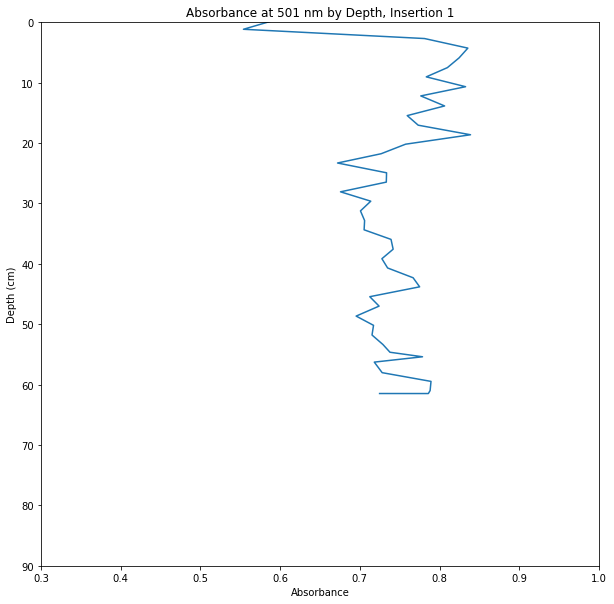

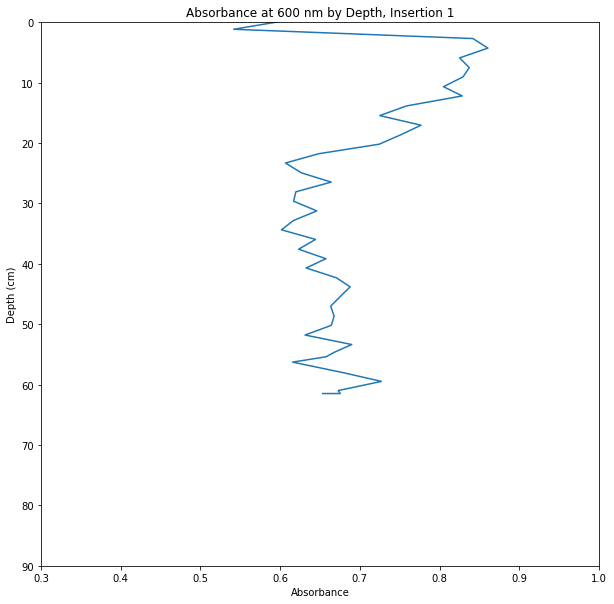

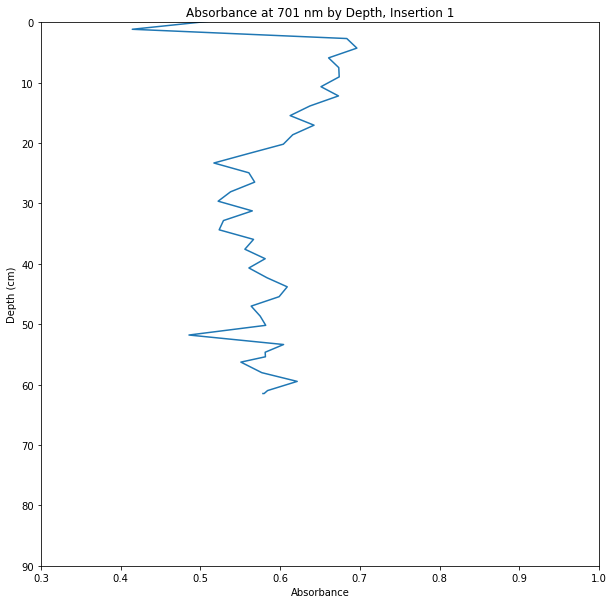

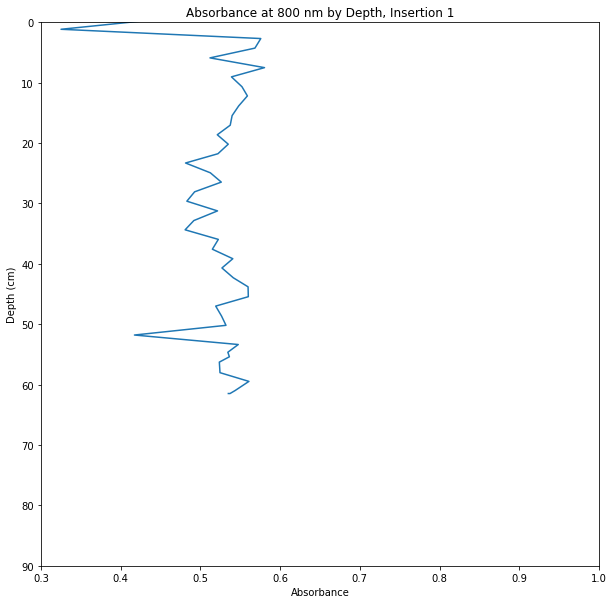

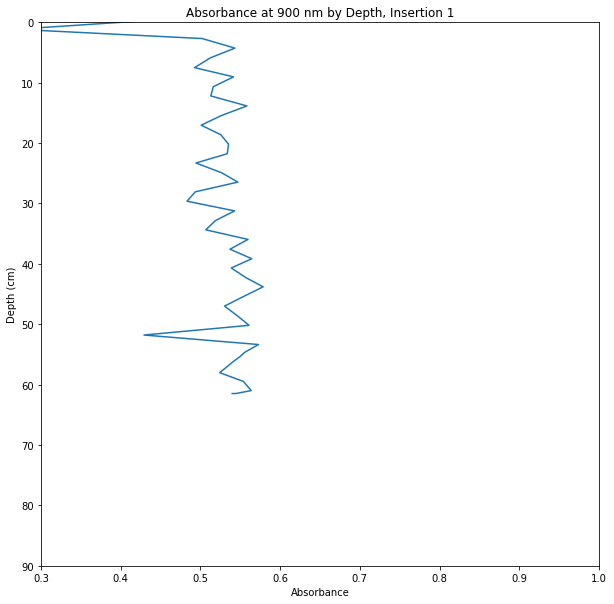

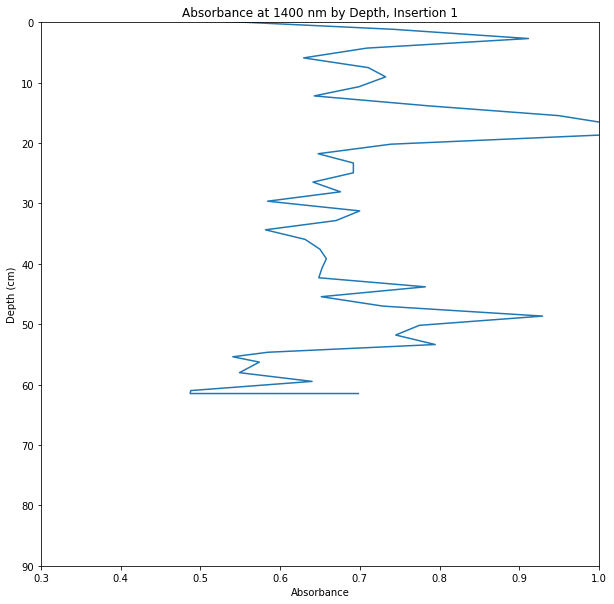

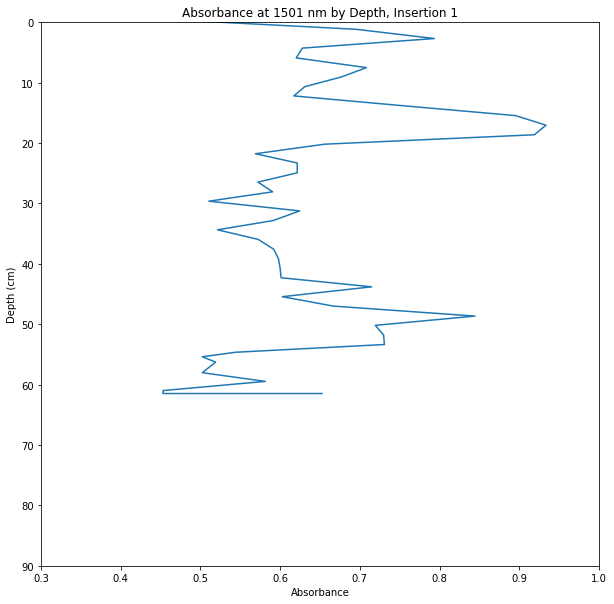

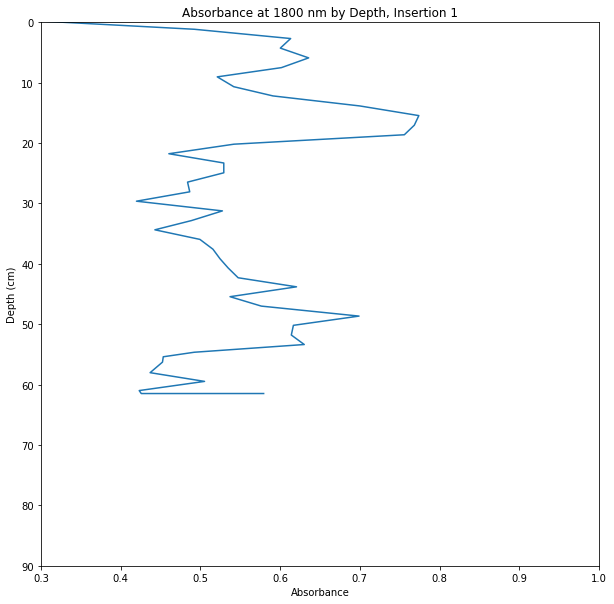

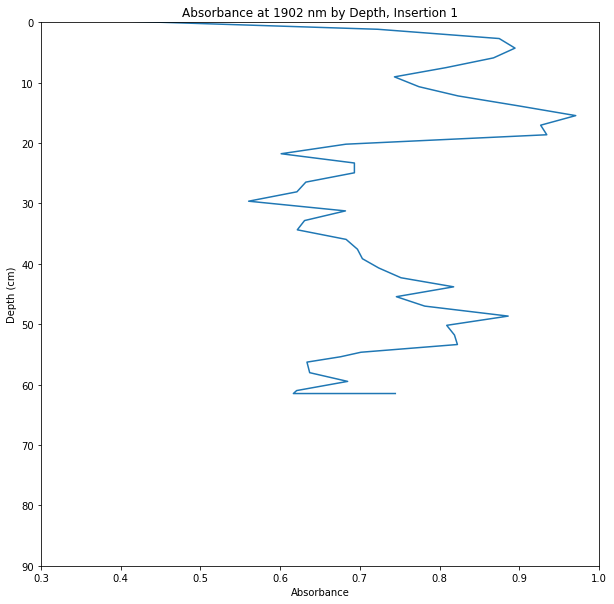

In [8]:
abs_waves = [501, 600, 701, 800, 900, 1400, 1501, 1800, 1902]
for i in range(len(abs_waves)):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Absorbance at {abs_waves[i]} nm by Depth, Insertion 1")
    ax.set_ylim(90.0, 0.0)
    ax.set_xlim(0.3, 1.0)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Absorbance")    
    ax.plot(ins1_abs_df[abs_waves[i]], ins1_abs_df['depth']);
    plt.show()

# Absorbance by depth at selected wavelengths, Insertion 4

In [9]:
abs4 = h5_file['session001/cal001/ins004/derived/absorbance_depth']
cols = vis_waves.astype(int).tolist()
cols = cols + ftir_waves.astype(int).tolist()
cols.append('force')
cols.append('depth')
ins4_abs_df = pd.DataFrame(data=abs4, columns=cols)
ins4_abs_df

489       490       492       493       495       496       498  \
0   0.721817  0.745454  0.724088  0.720860  0.734392  0.740034  0.735141   
1   0.738755  0.728487  0.746567  0.728550  0.721505  0.726849  0.718801   
2   0.749243  0.759124  0.777931  0.724338  0.760998  0.827556  0.761768   
3   0.747674  0.772420  0.758454  0.739622  0.780995  0.801627  0.778339   
4   0.743385  0.792945  0.744304  0.758098  0.747674  0.779082  0.754957   
5   0.741064  0.763110  0.793240  0.763797  0.788939  0.784122  0.759965   
6   0.759992  0.770786  0.739068  0.771515  0.750233  0.787252  0.754246   
7   0.768951  0.840015  0.798323  0.740709  0.834095  0.783732  0.814323   
8   0.751609  0.805124  0.754584  0.775033  0.819231  0.800006  0.782867   
9   0.769363  0.784871  0.740185  0.755088  0.772808  0.751819  0.777214   
10  0.751214  0.766326  0.727694  0.755088  0.774743  0.728218  0.774601   
11  0.703388  0.795095  0.706492  0.728903  0.708323  0.762074  0.743029   
12  0.735695  0.745069  0.713796  0.690101  0.712001  0.708120  0.741992   
13  0.739908  0.813138  0.781605  0.737457  0.731925  0.746422  0.768321   
14  0.718508  0.714658  0.715201  0.745449  0.732628  0.737575  0.728398   
15  0.697065  0.717173  0.672347  0.728197  0.702700  0.733739  0.763215   
16  0.732657  0.742388  0.706492  0.713985  0.742600  0.718053  0.725065   
17  0.717045  0.738966  0.723012  0.748762  0.758375  0.765423  0.757096   
18  0.714134  0.716093  0.687265  0.694317  0.723225  0.724463  0.722416   
19  0.712685  0.708258  0.722654  0.703873  0.698775  0.722091  0.717494   
20  0.691866  0.748928  0.698293  0.692042  0.694239  0.743927  0.740957   
21  0.670029  0.693000  0.706837  0.738177  0.680909  0.734086  0.703686   
22  0.706584  0.737831  0.710999  0.712284  0.732628  0.754724  0.723738   
23  0.764448  0.740104  0.767884  0.705877  0.773968  0.734086  0.761046   
24  0.764448  0.783609  0.780377  0.809746  0.814104  0.756916  0.777214   
25  0.768129  0.738587  0.751512  0.759989  0.752807  0.755454  0.771265   
26  0.785302  0.772011  0.780377  0.731380  0.773194  0.724124  0.777214   
27  0.742997  0.744302  0.758065  0.769960  0.752438  0.771062  0.768688   
28  0.776421  0.776118  0.770274  0.767639  0.788939  0.807348  0.806643   
29  0.785729  0.798557  0.783660  0.753965  0.803614  0.760964  0.810668   
30  0.760799  0.746609  0.748843  0.743985  0.723914  0.742153  0.756382   
31  0.693592  0.708965  0.690245  0.739984  0.739370  0.717718  0.748952   
32  0.699864  0.706497  0.725527  0.702875  0.737586  0.752906  0.697098   
33  0.706227  0.731828  0.723012  0.725738  0.716388  0.724803  0.704002   
34  0.700215  0.704393  0.684634  0.689455  0.710326  0.724803  0.758887   
35  0.733793  0.698142  0.718734  0.740709  0.749134  0.737926  0.738211   
36  0.746500  0.750092  0.715905  0.715352  0.761750  0.795179  0.738896   
37  0.786585  0.798123  0.780377  0.755088  0.834986  0.818177  0.763578   
38  0.746109  0.773239  0.767487  0.749501  0.702700  0.786468  0.723738   
39  0.728138  0.744302  0.740931  0.750984  0.753176  0.734434  0.711982   
40  0.783596  0.807335  0.811298  0.749871  0.828791  0.798794  0.838212   
41  0.785302  0.838107  0.746189  0.805094  0.779424  0.792786  0.803052   
42  0.747282  0.728857  0.746189  0.746183  0.755396  0.752906  0.772745   
43  0.718508  0.724438  0.730237  0.709912  0.717067  0.751457  0.733446   
44  0.722556  0.740104  0.728782  0.690747  0.745130  0.740387  0.739925   
45  0.748850  0.742007  0.732062  0.728197  0.729122  0.734086  0.758887   
46  0.744550  0.792945  0.750748  0.740709  0.783759  0.766171  0.755312   
47  0.747674  0.776531  0.744304  0.762651  0.754655  0.786076  0.754246   
48  0.752401  0.786558  0.751512  0.765330  0.797848  0.783342  0.803450   
49  0.740293  0.764715  0.756514  0.719822  0.748038  0.766920  0.761046   
50  0.702681  0.699523  0.725167  0.705877  0.735454  0.734434  0.705269   
51  0.715951  0.745069  0.723729  0.726088  0.716049  0.7

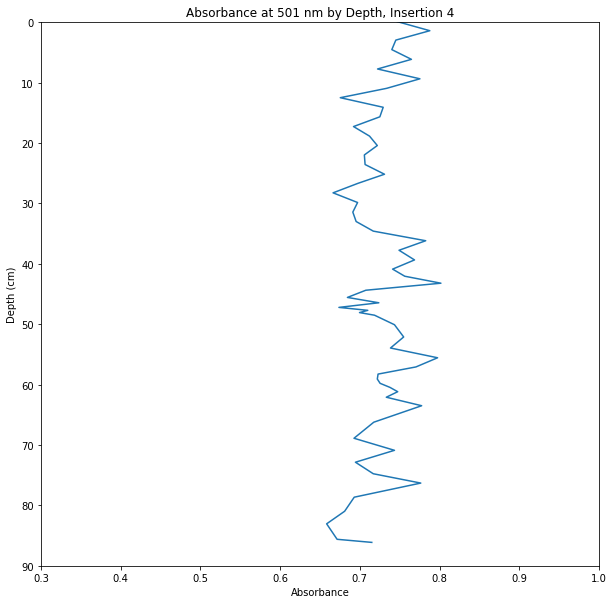

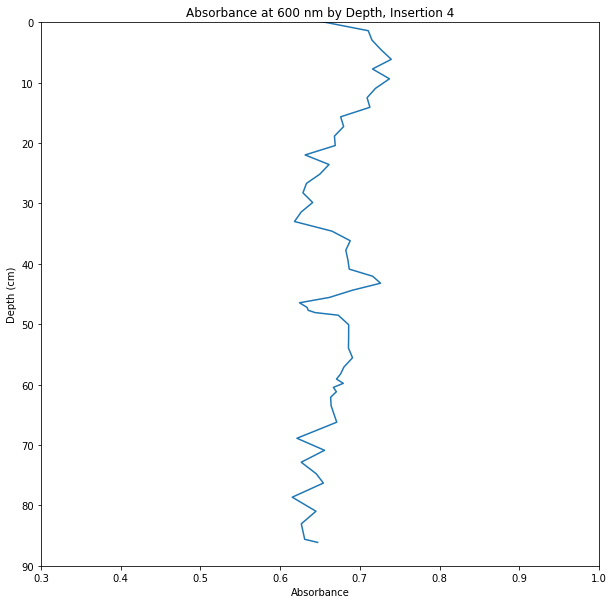

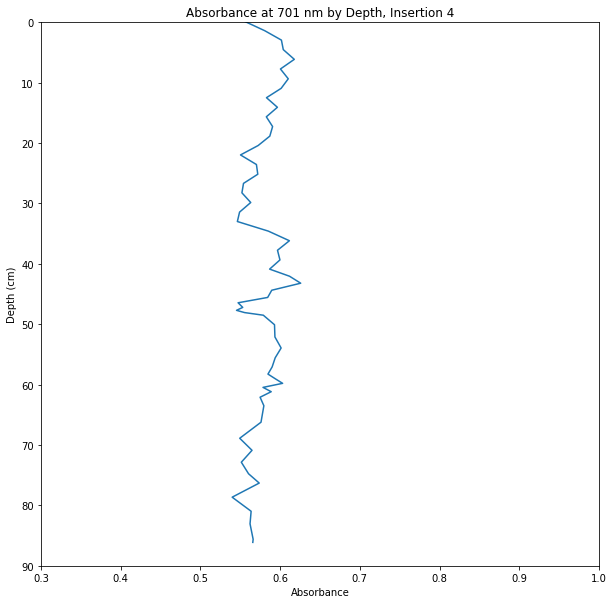

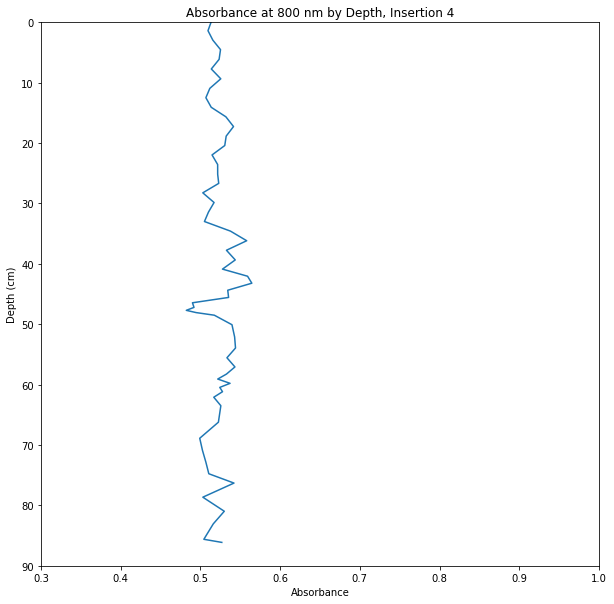

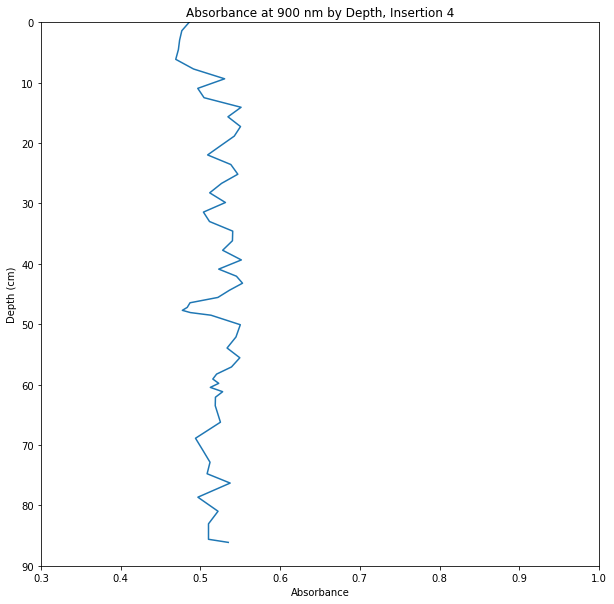

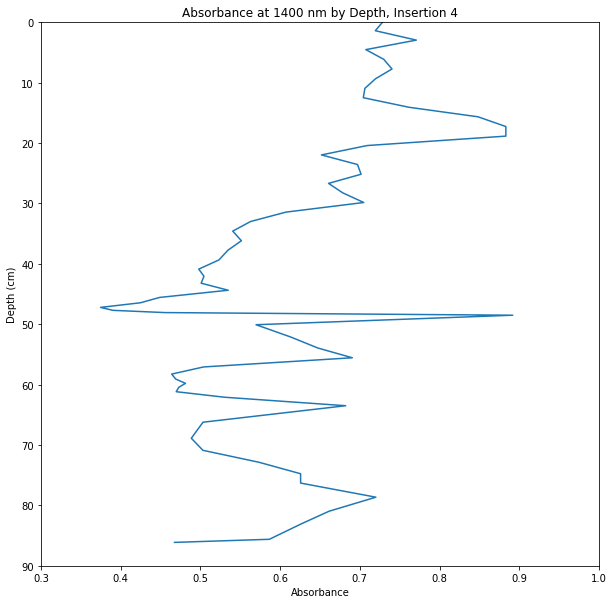

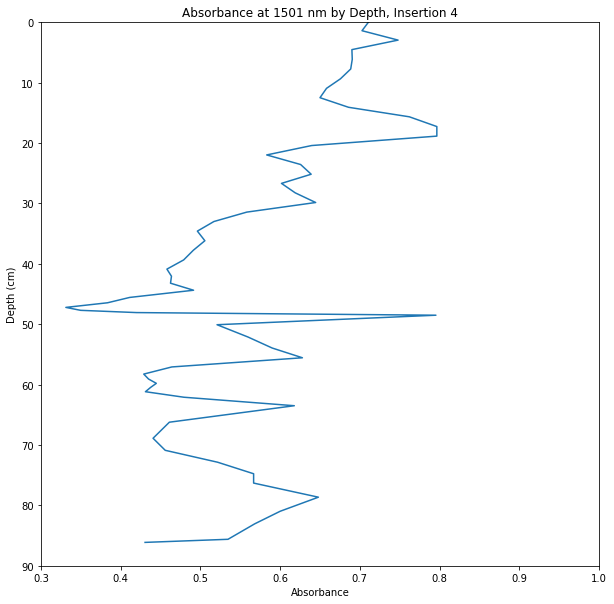

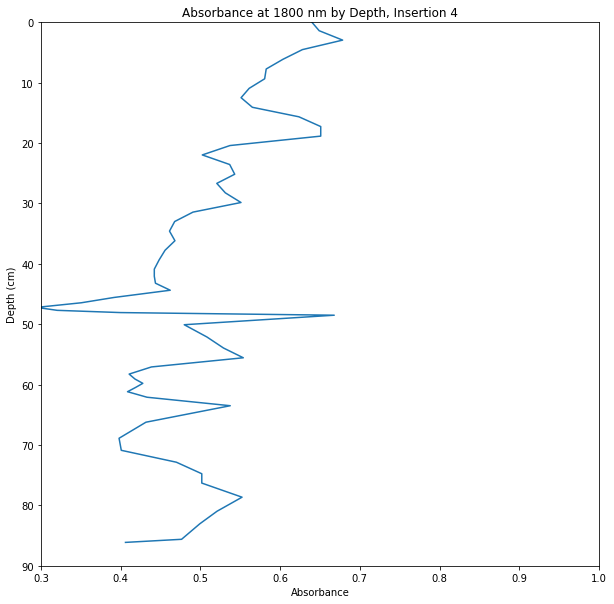

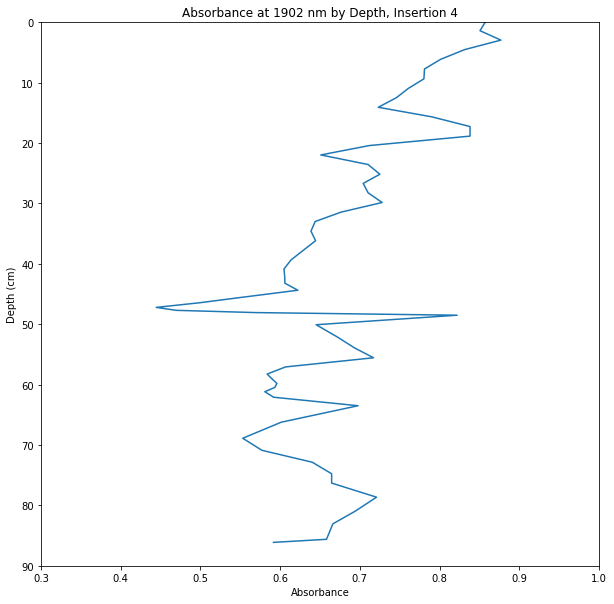

In [10]:
abs_waves = [501, 600, 701, 800, 900, 1400, 1501, 1800, 1902]
for i in range(len(abs_waves)):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Absorbance at {abs_waves[i]} nm by Depth, Insertion 4")
    ax.set_ylim(90.0, 0.0)
    ax.set_xlim(0.3, 1.0)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Absorbance")    
    ax.plot(ins4_abs_df[abs_waves[i]], ins4_abs_df['depth']);
    plt.show()

# NIRONE testing

- Insertion 1 in the back yard
- Insertion 2 at same location using vibration damping with a hand.
- Insertion 3 in the moist spiked canister
- Insertion 4 in the moist spiked canister using vibration damping
- Insertion 5 in the dry spiked canister
- Insertion 6 in the dry spiked canister
- Insertion 7 in the dry spiked canister using vibration damping

In [11]:
h5_file.close()
file_name = "data/210407/nirone_210407.h5"
h5_file = h5py.File(file_name, "r")

In [12]:
insertions = list(h5_file['session002/cal002'].keys())
insertions

['ins001', 'ins002', 'ins003', 'ins004', 'ins005', 'ins006', 'ins007']

In [13]:
waves = h5_file['session002/cal002'].attrs['spec1_wavelengths_vector'][:]


# Absorbance spectra

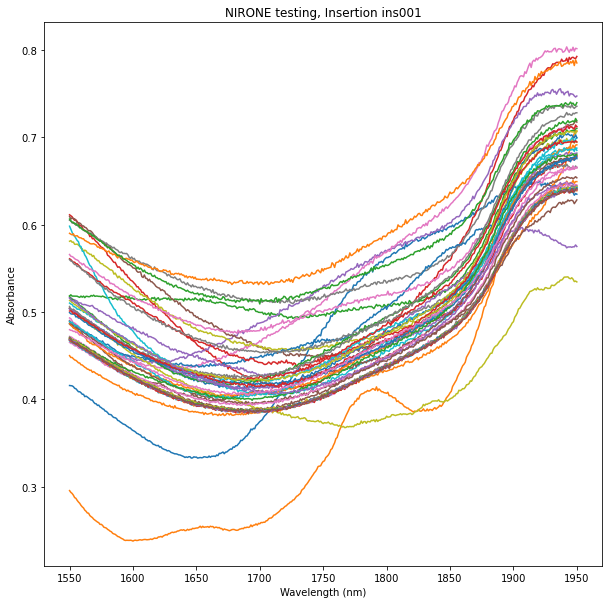

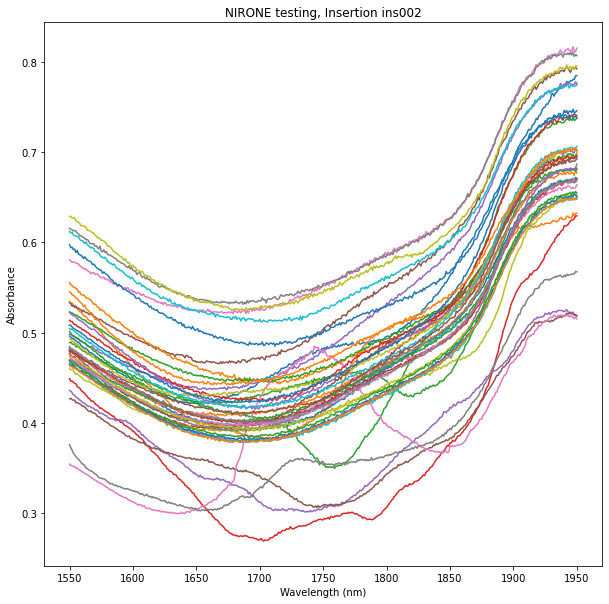

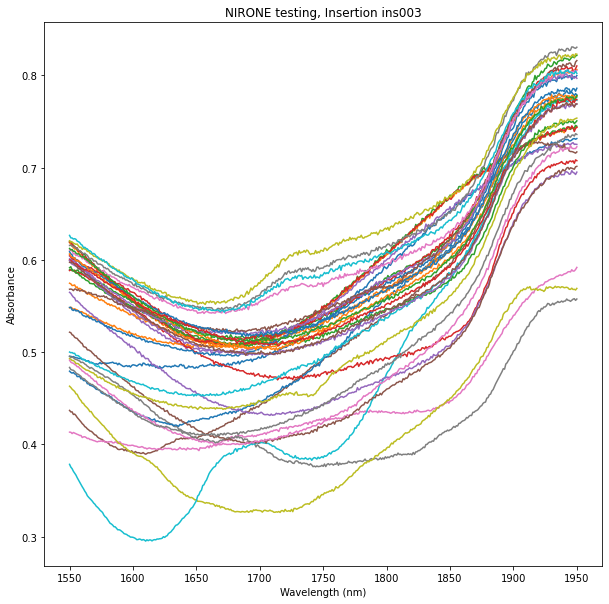

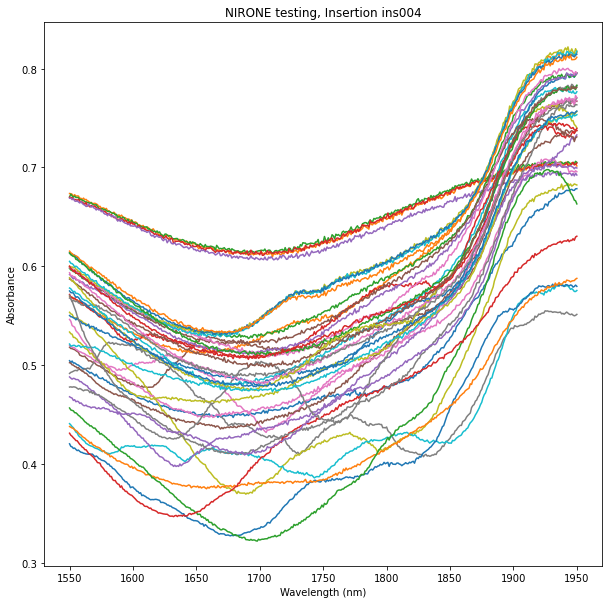

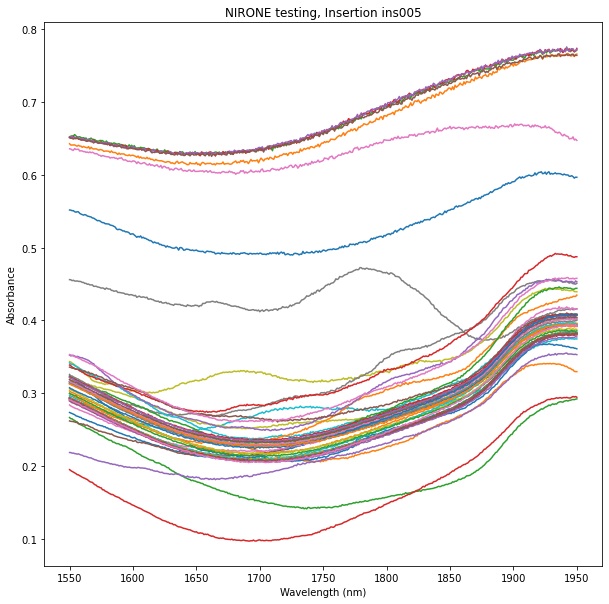

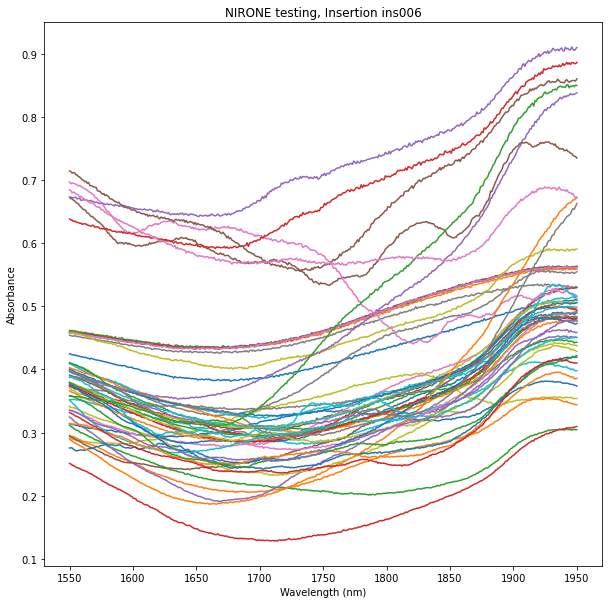

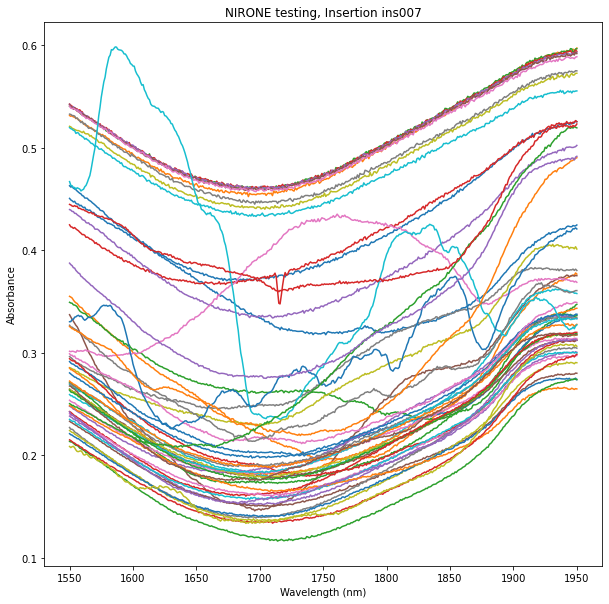

In [14]:
for insertion in insertions:
    ins_abs = h5_file[f'session002/cal002/{insertion}/spectrometer1/derived/absorbances'][:]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"NIRONE testing, Insertion {insertion}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    for i in range (ins_abs.shape[0]):
        ax.plot(waves, ins_abs[i, :])
    plt.show()

# Force by depth

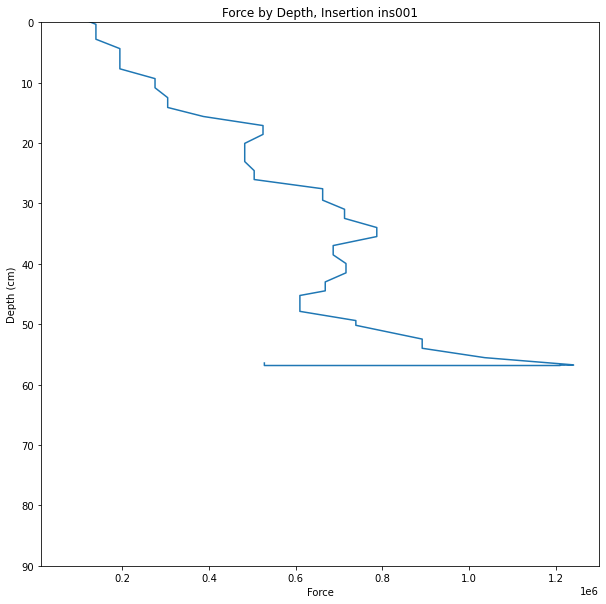

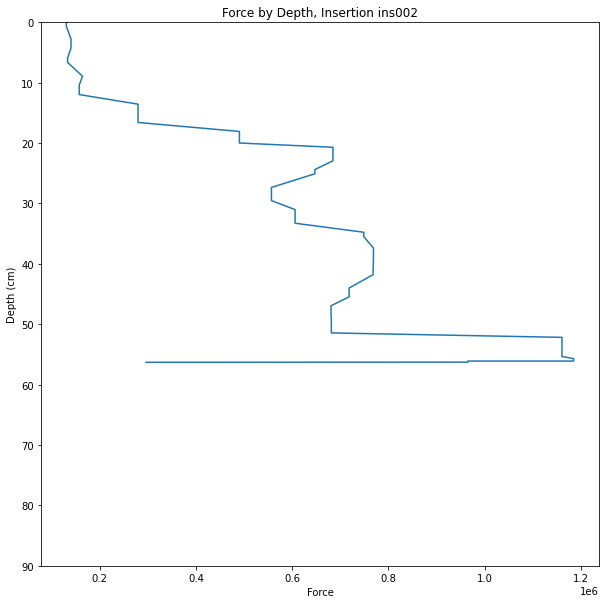

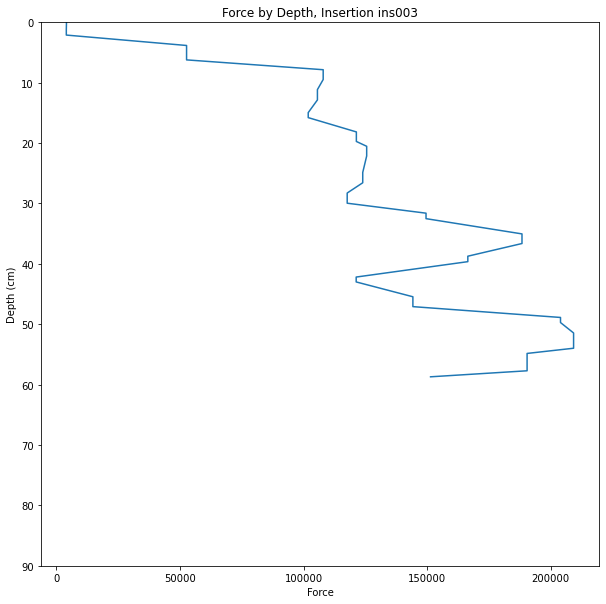

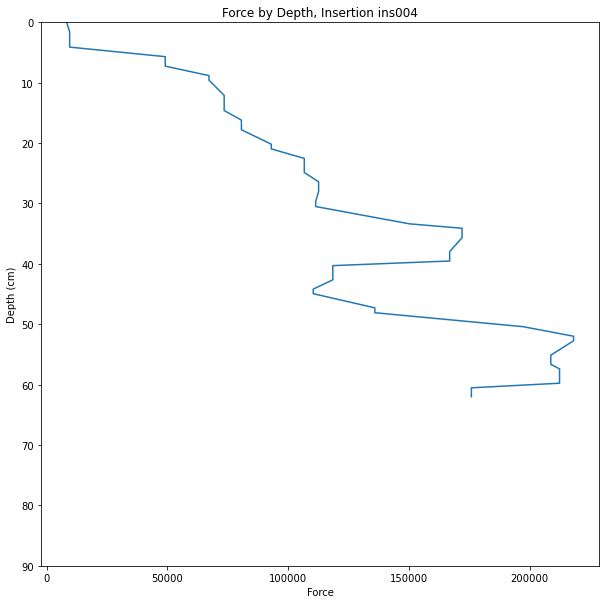

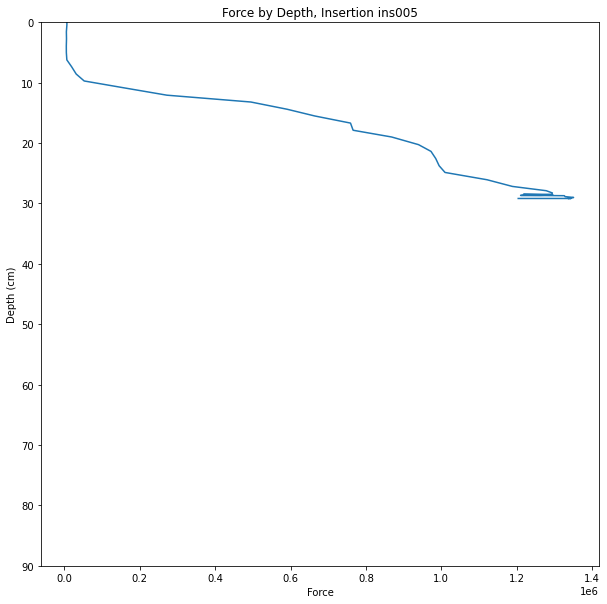

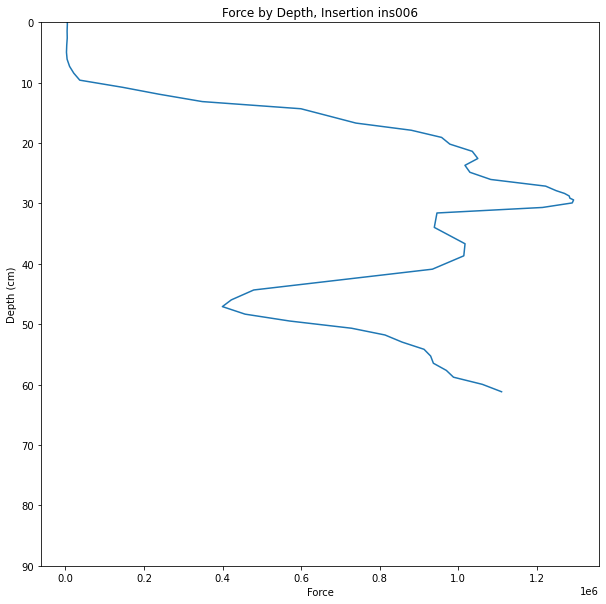

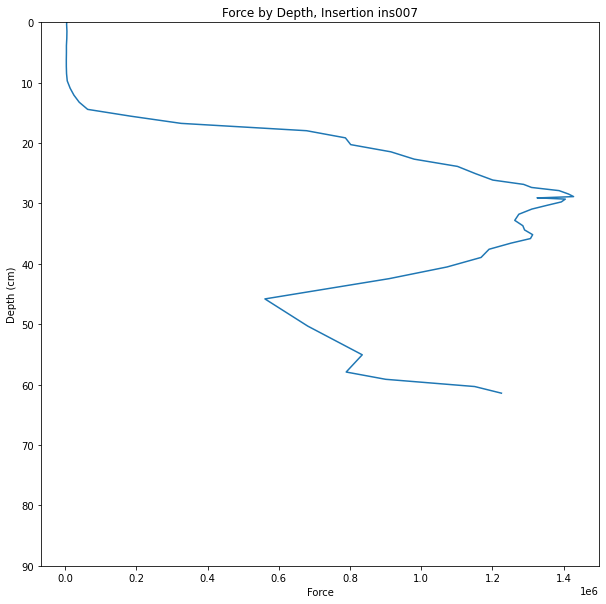

In [15]:
for insertion in insertions:
    ins_force = h5_file[f'session002/cal002/{insertion}/derived/absorbance_depth'][:, -2]
    ins_depth = h5_file[f'session002/cal002/{insertion}/derived/absorbance_depth'][:, -1]
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Force by Depth, Insertion {insertion}")
    ax.set_ylim(90.0, 0.0)
    # ax.set_xlim(0, 175000)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Force")
    ax.plot(ins_force, ins_depth )

# Selected plots of absorbance by depth

In [16]:
abs1 = h5_file['session002/cal002/ins001/derived/absorbance_depth']
cols = waves.astype(int).tolist()

cols.append('force')
cols.append('depth')
ins1_abs_df = pd.DataFrame(data=abs1, columns=cols)
ins1_abs_df

1550      1551      1552      1553      1554      1555      1556  \
0   0.415806  0.415589  0.415434  0.414534  0.412612  0.412118  0.410375   
1   0.295557  0.293511  0.292312  0.290325  0.287543  0.286724  0.284371   
2   0.518343  0.519591  0.518163  0.518112  0.518043  0.517940  0.518037   
3   0.611196  0.610155  0.608975  0.606454  0.604882  0.605213  0.603554   
4   0.490212  0.488128  0.487517  0.487260  0.486468  0.484315  0.482459   
5   0.609388  0.606227  0.607746  0.606945  0.606514  0.605050  0.602011   
6   0.493151  0.492244  0.489818  0.487384  0.487275  0.486109  0.484681   
7   0.604981  0.604195  0.601814  0.601503  0.601797  0.599219  0.599345   
8   0.580899  0.581604  0.579784  0.580008  0.577419  0.577410  0.577662   
9   0.598134  0.594573  0.590974  0.587759  0.586694  0.584196  0.581820   
10  0.486920  0.485344  0.484364  0.483799  0.482271  0.483082  0.481906   
11  0.589980  0.588978  0.588306  0.589483  0.586850  0.587081  0.587270   
12  0.606282  0.604195  0.602783  0.602634  0.600666  0.601154  0.599345   
13  0.560860  0.559910  0.558160  0.556971  0.556955  0.555115  0.555114   
14  0.516154  0.516334  0.515111  0.513936  0.513729  0.512965  0.512264   
15  0.486179  0.484604  0.484426  0.481712  0.482087  0.481177  0.479760   
16  0.565728  0.563734  0.563373  0.562469  0.560986  0.560013  0.559502   
17  0.559835  0.558302  0.557868  0.555734  0.554264  0.554317  0.551925   
18  0.504468  0.502386  0.502473  0.500106  0.500013  0.499266  0.497998   
19  0.510174  0.509043  0.508486  0.506220  0.505810  0.504862  0.503131   
20  0.504018  0.502515  0.500807  0.500361  0.499885  0.498691  0.496979   
21  0.487044  0.484789  0.483380  0.482079  0.481105  0.479586  0.479576   
22  0.517878  0.514615  0.514319  0.514002  0.511752  0.510859  0.510094   
23  0.504339  0.502836  0.501063  0.501386  0.499373  0.498627  0.497998   
24  0.503310  0.503671  0.502152  0.501322  0.500269  0.499777  0.498764   
25  0.489340  0.486270  0.485969  0.484415  0.485230  0.483636  0.483075   
26  0.471963  0.471386  0.470665  0.469332  0.468487  0.467955  0.466389   
27  0.506276  0.503093  0.502473  0.503184  0.501872  0.500674  0.500236   
28  0.513055  0.512181  0.510705  0.509930  0.508216  0.508111  0.506436   
29  0.488967  0.487570  0.488386  0.486145  0.484920  0.484068  0.484372   
30  0.499282  0.497856  0.497494  0.497747  0.497270  0.494246  0.494883   
31  0.449995  0.447849  0.447938  0.446373  0.445087  0.444571  0.443345   
32  0.470888  0.469777  0.468166  0.468083  0.466468  0.466945  0.465263   
33  0.501068  0.501297  0.499657  0.497875  0.498607  0.497607  0.496788   
34  0.515956  0.513956  0.512475  0.513079  0.511620  0.510072  0.510422   
35  0.468569  0.469063  0.467691  0.466839  0.465935  0.466174  0.464436   
36  0.465319  0.463926  0.463915  0.462597  0.461287  0.460994  0.460849   
37  0.469222  0.466694  0.466153  0.465479  0.464341  0.463223  0.463080   
38  0.469876  0.468648  0.468403  0.467016  0.466646  0.466708  0.465441   
39  0.466912  0.465455  0.465681  0.464595  0.463516  0.462929  0.462433   
40  0.468747  0.466340  0.465150  0.464477  0.464046  0.462224  0.464436   
41  0.469044  0.465927  0.466271  0.464831  0.465699  0.463047  0.463198   
42  0.468213  0.468292  0.467514  0.465656  0.465049  0.463930  0.463905   
43  0.467799  0.466930  0.466389  0.464889  0.464459  0.463812  0.462433   
44  0.468391  0.467936  0.466922  0.465892  0.466172  0.465228  0.463846   
45  0.470114  0.468114  0.466685  0.465184  0.464518  0.463635  0.464495   
46  0.479681  0.478916  0.478796  0.477687  0.477931  0.476482  0.477137   

        1557      1558      1559  ...      1943      1944      1945      1946  \
0   0.408679  0.408728  0.407535  ...  0.638199  0.637893  0.636498  0.637949   
1   0.282489  0.281010  0.278678  ...  0.681785  0.682731  0.691689  0.695727   
2   0.517250  0.516753  0.518130  ...  0.706645  0.706205  0.707092  0.707494   
3   0.601310  0.598737  0.598613  .

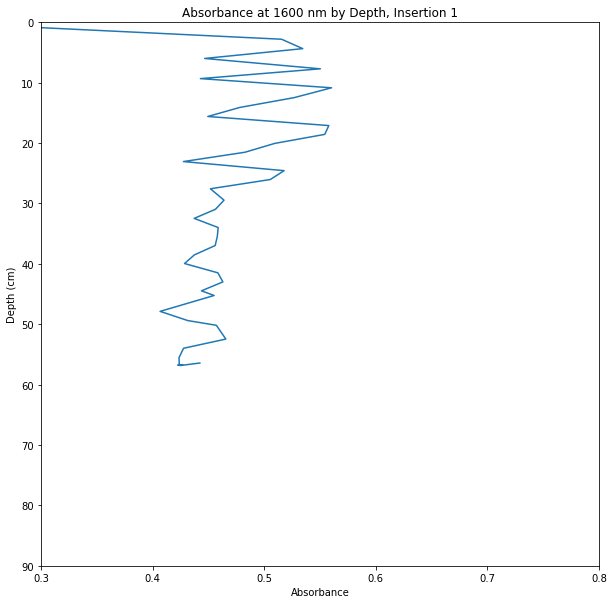

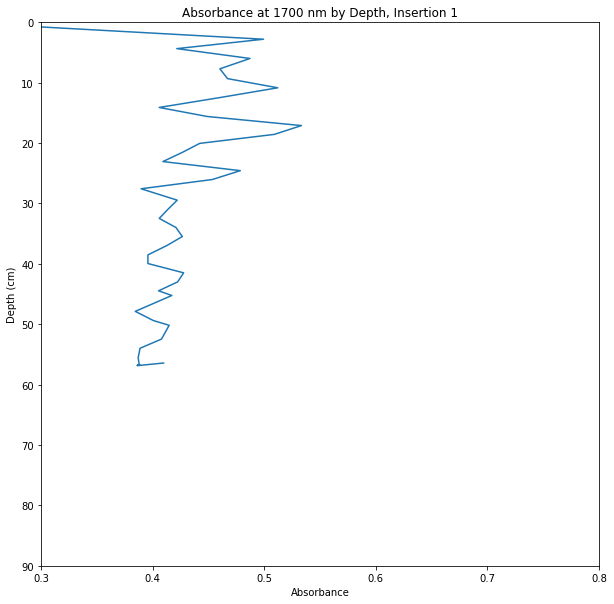

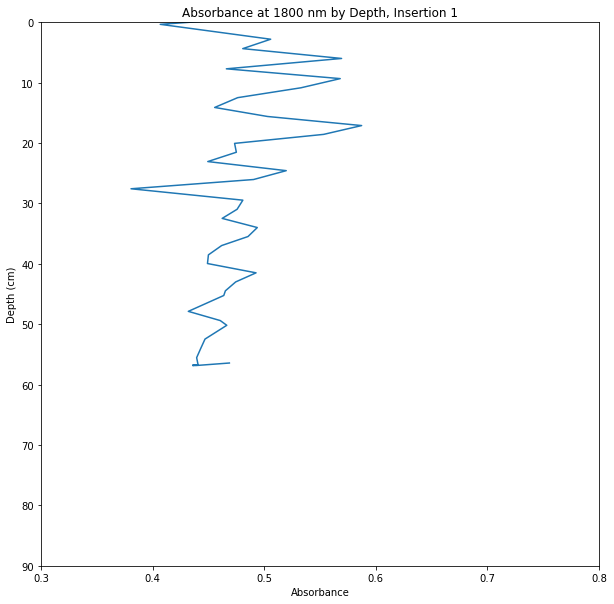

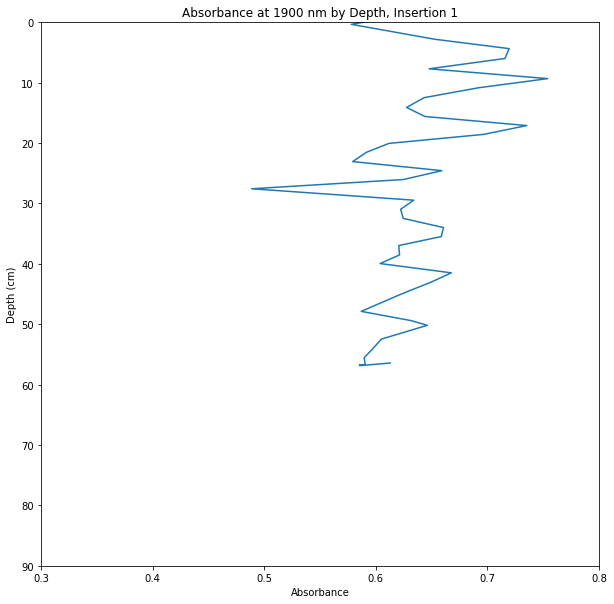

In [17]:
abs_waves = [1600, 1700, 1800, 1900]
for i in range(len(abs_waves)):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Absorbance at {abs_waves[i]} nm by Depth, Insertion 1")
    ax.set_ylim(90.0, 0.0)
    ax.set_xlim(0.3, 0.8)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Absorbance")    
    ax.plot(ins1_abs_df[abs_waves[i]], ins1_abs_df['depth']);
    plt.show()

In [18]:
abs4 = h5_file['session002/cal002/ins004/derived/absorbance_depth']
cols = waves.astype(int).tolist()

cols.append('force')
cols.append('depth')
ins4_abs_df = pd.DataFrame(data=abs4, columns=cols)
ins4_abs_df

1550      1551      1552      1553      1554      1555      1556  \
0   0.504339  0.502515  0.504017  0.501963  0.502129  0.501123  0.500236   
1   0.673620  0.673402  0.672856  0.670843  0.672440  0.670963  0.671190   
2   0.670210  0.673022  0.671243  0.669897  0.671015  0.669636  0.669577   
3   0.669927  0.669332  0.669447  0.668105  0.667425  0.667466  0.666558   
4   0.668891  0.669050  0.667377  0.668388  0.666109  0.665680  0.666182   
5   0.518011  0.516665  0.516568  0.515920  0.515582  0.514551  0.513716   
6   0.546150  0.544375  0.540005  0.539060  0.538319  0.534741  0.533264   
7   0.491460  0.492557  0.493010  0.493698  0.494355  0.494562  0.494124   
8   0.553371  0.551713  0.551280  0.548744  0.547358  0.547836  0.547327   
9   0.440608  0.439279  0.437586  0.436491  0.434173  0.432074  0.431308   
10  0.420188  0.417589  0.417066  0.415532  0.415921  0.414530  0.413357   
11  0.437726  0.437011  0.436206  0.435829  0.434503  0.433555  0.432788   
12  0.456463  0.454461  0.454040  0.453605  0.451735  0.451615  0.450491   
13  0.430930  0.428867  0.427853  0.426289  0.425086  0.423455  0.423340   
14  0.487911  0.486703  0.485660  0.486516  0.486220  0.485242  0.485300   
15  0.502348  0.501810  0.500104  0.499914  0.498607  0.498244  0.496915   
16  0.520076  0.518658  0.517963  0.517580  0.517310  0.515810  0.515174   
17  0.477678  0.477884  0.477521  0.477869  0.477749  0.477332  0.476408   
18  0.533364  0.531635  0.531204  0.527949  0.527960  0.526838  0.525924   
19  0.521213  0.518991  0.519429  0.519915  0.519847  0.518742  0.518906   
20  0.550067  0.548849  0.548702  0.547816  0.547287  0.545697  0.547541   
21  0.569079  0.569160  0.568351  0.567814  0.566991  0.565933  0.565049   
22  0.597815  0.596162  0.595564  0.595252  0.594259  0.592751  0.593345   
23  0.571402  0.568562  0.568575  0.566993  0.567589  0.566232  0.565943   
24  0.591630  0.590390  0.588619  0.587134  0.588965  0.586143  0.586252   
25  0.599094  0.597038  0.596759  0.595969  0.595055  0.594816  0.594458   
26  0.598614  0.598957  0.597078  0.596766  0.595852  0.594259  0.593186   
27  0.570501  0.567220  0.564927  0.561069  0.557685  0.554099  0.549620   
28  0.600057  0.599197  0.599319  0.598446  0.598975  0.597132  0.596294   
29  0.604900  0.602981  0.602622  0.601503  0.599216  0.600105  0.599264   
30  0.613508  0.612298  0.611443  0.610638  0.611366  0.608242  0.608956   
31  0.615250  0.613621  0.612766  0.611628  0.610540  0.610548  0.609780   
32  0.613342  0.611637  0.610701  0.609897  0.609962  0.606930  0.606574   
33  0.599976  0.597757  0.596519  0.594457  0.596092  0.593068  0.592789   
34  0.467799  0.467048  0.466508  0.464124  0.464872  0.462812  0.463315   
35  0.587087  0.586247  0.585576  0.584332  0.583347  0.582103  0.581588   
36  0.593365  0.590390  0.590580  0.589326  0.589437  0.587707  0.586096   
37  0.567735  0.567071  0.564039  0.565579  0.564683  0.564074  0.564900   
38  0.588336  0.586947  0.584721  0.585186  0.582882  0.581639  0.580275   
39  0.577913  0.577086  0.575357  0.574133  0.574522  0.572465  0.572482   
40  0.574949  0.573294  0.573084  0.572998  0.570439  0.568474  0.569163   

        1557      1558      1559  ...      1943      1944      1945      1946  \
0   0.499913  0.498771  0.497960  ...  0.676630  0.676648  0.677510  0.677839   
1   0.671107  0.668856  0.668772  ...  0.705150  0.702245  0.703251  0.704769   
2   0.669587  0.667437  0.667541  ...  0.705896  0.704840  0.703745  0.703659   
3   0.667790  0.665929  0.665278  ...  0.702051  0.701629  0.702019  0.703290   
4   0.665155  0.664050  0.665372  ...  0.693371  0.694068  0.693977  0.691754   
5   0.512867  0.510062  0.509502  ...  0.736743  0.734723  0.736300  0.737322   
6   0.531981  0.529834  0.527617  ...  0.699098  0.694915  0.696155  0.696453   
7   0.495510  0.495834  0.494899  ...  0.552472  0.551477  0.550947  0.551632   
8   0.545731  0.545598  0.544949  ...  0.683675  0.681554  0.683244  0.681101   
9   0

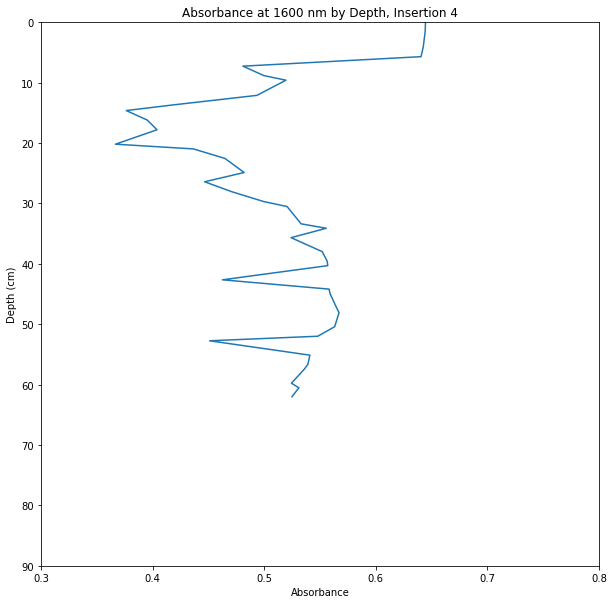

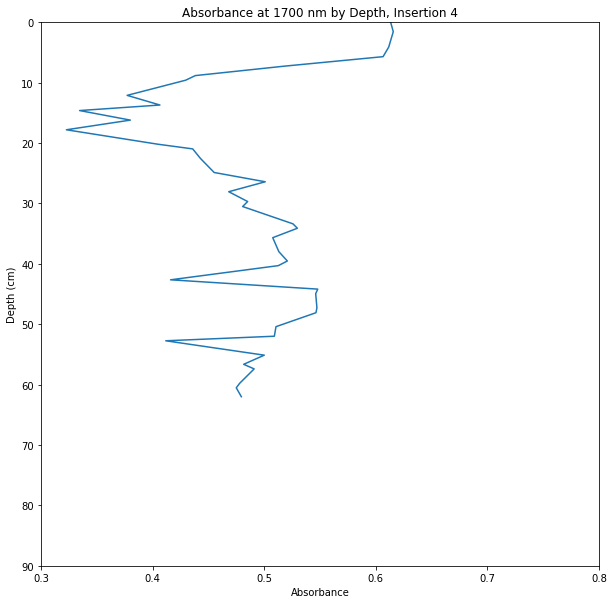

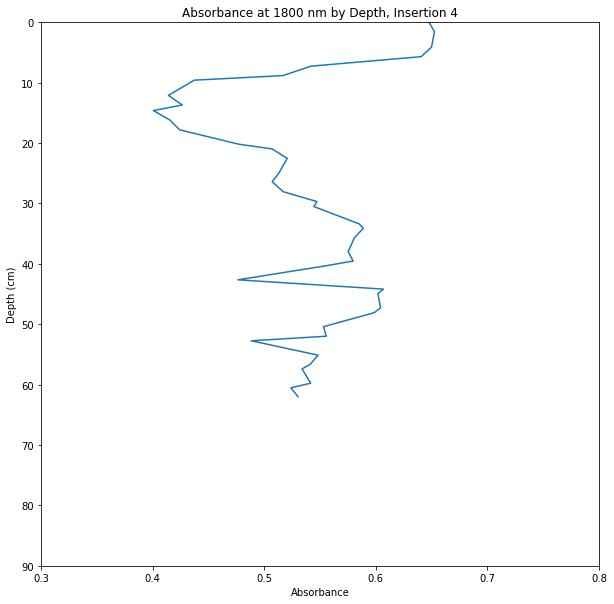

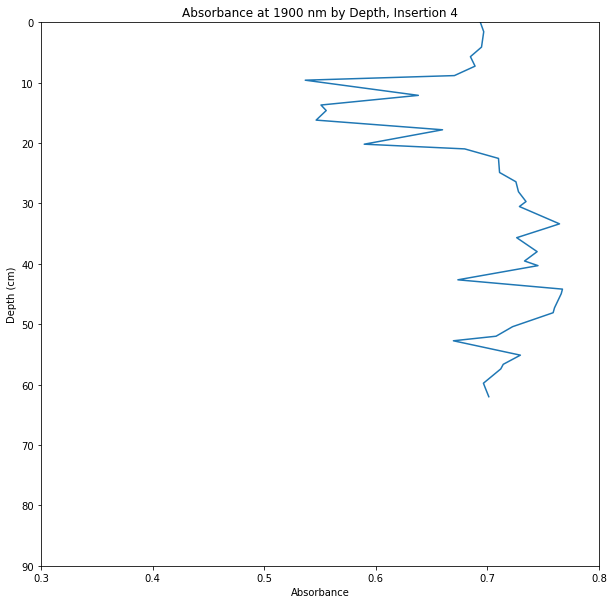

In [19]:
abs_waves = [1600, 1700, 1800, 1900]
for i in range(len(abs_waves)):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Absorbance at {abs_waves[i]} nm by Depth, Insertion 4")
    ax.set_ylim(90.0, 0.0)
    ax.set_xlim(0.3, 0.8)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Absorbance")    
    ax.plot(ins4_abs_df[abs_waves[i]], ins4_abs_df['depth']);
    plt.show()